# <center>Tugas Besar Pembelajaran Mesin Lanjut</center>

<b>Topik</b>
Implementation of Swarm Intelligence

<b>Dikerjakan oleh</b>
Adinda Arwa Salsabil - 1301204011


Fungsi yang dikerjakan

Tulis fungsi di sini



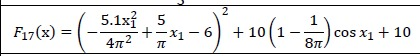




Range yang digunakan
- Misal: [-3, 4]

Algoritma yang digunakan
- PSO (Particle Swarm Optimization)
- GWO (Grey Wolf Optimizer)





# **IMPORT**

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# **Fitness unction**

In [ ]:
# Tuliskan fungsi di sini (untuk evaluasi fitness function)

def F_17(x1, x2):
    term1 = -(5.1 * x1**2 / (4 * np.pi**2)) + 5 / np.pi * x1 - 6
    term2 = 10 * (1 - (1 / (8 * np.pi))) * np.cos(x2)
    return term1**2 + term2 + 10

In [ ]:
# Membuat grid titik-titik pada rentang (-3, 4)
x1 = np.linspace(-3, 4, 100)
x2 = np.linspace(-3, 4, 100)
X1, X2 = np.meshgrid(x1, x2)

# Menghitung nilai fungsi F_17 pada setiap titik grid
Z = F_17(X1, X2)

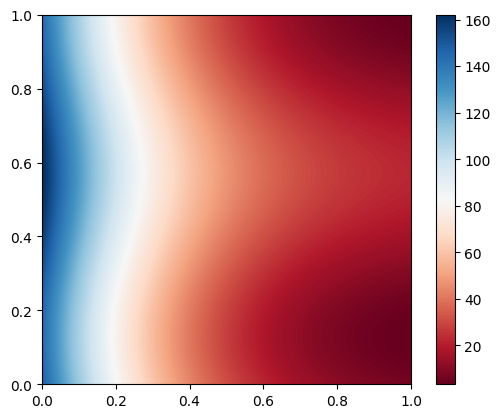

In [ ]:
fig, ax = plt.subplots()

im = ax.imshow(Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max(), extent=[0, 1, 0, 1])
im.set_interpolation('bilinear')

cb = fig.colorbar(im, ax=ax)

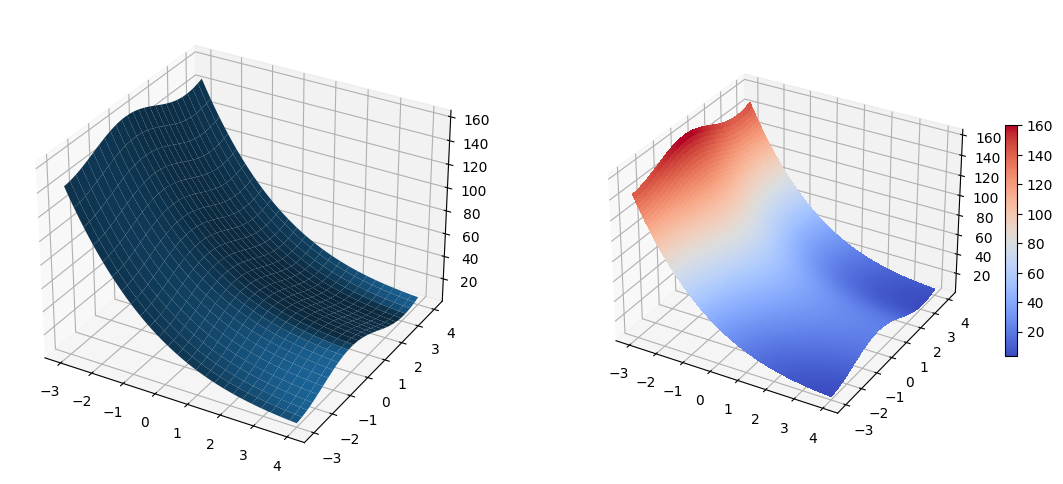

In [ ]:
fig = plt.figure(figsize=(14,6))

# `ax` is a 3D-aware axis instance because of the projection='3d' keyword argument to add_subplot
ax = fig.add_subplot(1, 2, 1, projection='3d')

p = ax.plot_surface(X1, X2, Z, rstride=4, cstride=4, linewidth=0)

# surface_plot with color grading and color bar
ax = fig.add_subplot(1, 2, 2, projection='3d')
p = ax.plot_surface(X1, X2, Z, rstride=1, cstride=1, cmap=matplotlib.cm.coolwarm, linewidth=0, antialiased=False)
cb = fig.colorbar(p, shrink=0.5)

#### Latar Belakang algoritma 1
Silahkan double click cell ini dan tulis latar belakang algoritma 1!

Particle Swarm Optimization (PSO) adalah algoritma yang digunakan untuk mencari solusi yang optimal dalam pencarian yang kompleks, algoritma ini terinspirasi oleh perilaku kelompok hewan yang menyerupai gerakan burung atau ikan.

PSO dalam menghasilkan posisi partikel terbaik dan nilai fitness terbaik  dengan menginisialisasi sejumlah partikel di dalam ruang pencarian, tiap partikel mewakili satu solusi potensial dalam ruang tersebut, tiap partikel memiliki posisi dan kecepatan  yang diperbarui secara iterati selama proses optimisasi

Iterasi yang dilakukan PSO dengan melibatkan evaluasi fitness untuk setiap partikel berdasarkan fungsi dan tujuan , ini berggantung pada masalah yang sedang diselesaikan. Setelag evaluasi akan memperoleh pembaruan informasi partikel yang terbaik (personal best) dan juga informasi yang ditemukan (global best)

Selama beralngsungnya iterasi, partikel-partikel saling berinteraksi dan bergerak disekitar ruang penarian, hingga mencapai kriteria berhenti yang telah ditentukan yang menghasilkan posisi partikel yang memiliki fitness terbaik, yang diharapkan merupakan solusi yang mendekati optimal dalam ruang pencarian yang diberikan

Pada code fungsi pso_search mengimplementasikan langkah-langkah utama dari algoritma PSO, tiap partikel diinisialisasi secra acak dalam ruang pencarian, dan kemudian posisi dan kecepatan akan diperbarui selama iterasi, evaluasi fitness pebaruan personal best, global, best dan pergerakan partikel dilakukan dalam setiap iterasi, dan akan mencari solusi optimal berdasarkan fungsi tujuan fitness_func_pso yang diberikan.

In [ ]:
#  Algortima 1 PSO

def pso_search(fitness_func_pso, num_particles_pso, num_iterations_pso, bounds_pso):
    # Inisialisasi partikel
    num_dimensions = len(bounds_pso)
    particles = np.random.uniform(bounds_pso[:, 0], bounds_pso[:, 1], (num_particles_pso, num_dimensions))
    velocities = np.zeros((num_particles_pso, num_dimensions))
    personal_best_positions = particles.copy()
    personal_best_fitness = np.full(num_particles_pso, np.inf)
    global_best_position = None
    global_best_fitness = np.inf

    for _ in range(num_iterations_pso):
        # Evaluasi fitness untuk setiap partikel
        fitness = np.array([fitness_func_pso(p[0], p[1]) for p in particles])

        # Perbarui personal best
        mask = fitness < personal_best_fitness
        personal_best_positions[mask] = particles[mask]
        personal_best_fitness[mask] = fitness[mask]

        # Perbarui global best
        best_particle = np.argmin(personal_best_fitness)
        if personal_best_fitness[best_particle] < global_best_fitness:
            global_best_position = personal_best_positions[best_particle]
            global_best_fitness = personal_best_fitness[best_particle]

        # Perbarui kecepatan dan posisi partikel
        r1, r2 = np.random.rand(2)
        velocities = 0.5 * velocities + 1.0 * r1 * (personal_best_positions - particles) + 2.0 * r2 * (global_best_position - particles)
        particles += velocities

        # Batasi posisi partikel sesuai dengan batasan
        particles = np.clip(particles, bounds_pso[:, 0], bounds_pso[:, 1])

    return global_best_position, global_best_fitness

# Inisialisasi parameter
num_particles_pso = 30
num_iterations_pso = 100
bounds_pso = np.array([(-3, 4), (-3, 4)])

best_position, best_fitness = pso_search(F_17, num_particles_pso, num_iterations_pso, bounds_pso)

print("Optimal solution:")
print("Position:", best_position)
print("Fitness:", best_fitness)

Optimal solution:
Position: [ 4. -3.]
Fitness: 3.386546138728445


#### Latar Belakang algoritma 2
Silahkan double click cell ini dan tulis latar belakang algoritma 2!

Grey Wold Optimizer (GWO) ialah algoritma optimisasi yang terinspirasi dari perilaku kelompok serigala dalam mencari mangsa. Algoritma ini berperan dalam mencari solusi optimal dalam ruang pencarian dengan menggunakan taktik kolaborasi dan hierarki dalam kelompok serigala. Serigala alfa adalah yang memiliki posisi terbaik sedangakan beta dan delta menduduki peran berikutnya dalam hierarki, posisisi akan dipercbarui secara iteratif dengan mempertimbangkan posisi terbaik dan pergerakan serigala alpha.



In [ ]:
# Algoritma 2

def gwo_search(fitness_func_gwo, num_wolves_gwo, num_iterations_gwo, bounds_gwo):
    num_dimensions = len(bounds_gwo)

    # Inisialisasi posisi serigala secara acak
    positions = np.random.uniform(bounds_gwo[:, 0], bounds_gwo[:, 1], (num_wolves_gwo, num_dimensions))
    best_positions = positions.copy()
    best_fitness = np.full(num_wolves_gwo, np.inf)

    for _ in range(num_iterations_gwo):
        a = 2 - 2 * (_ / num_iterations_gwo)  # Faktor a yang berkurang seiring dengan iterasi
        for i in range(num_wolves_gwo):
            # Evaluasi fitness
            fitness = fitness_func_gwo(positions[i, 0], positions[i, 1])

            if fitness < best_fitness[i]:
                best_positions[i] = positions[i]
                best_fitness[i] = fitness

            alpha_wolf = best_positions[np.argmin(best_fitness)]

            # Perbarui posisi serigala
            r1, r2 = np.random.rand(2)
            A1 = 2 * a * r1 - a
            C1 = 2 * r2
            D_alpha = np.abs(C1 * alpha_wolf - positions[i])
            new_position = alpha_wolf - A1 * D_alpha

            r1, r2 = np.random.rand(2)
            A2 = 2 * a * r1 - a
            C2 = 2 * r2
            D_beta = np.abs(C2 * best_positions[i] - positions[i])
            new_position -= A2 * D_beta

            r1, r2 = np.random.rand(2)
            A3 = 2 * a * r1 - a
            C3 = 2 * r2
            D_delta = np.abs(C3 * best_positions[i] - positions[i])
            new_position -= A3 * D_delta

            # Batasi posisi serigala sesuai dengan batasan
            new_position = np.clip(new_position, bounds_gwo[:, 0], bounds_gwo[:, 1])
            positions[i] = new_position

    best_wolf = np.argmin(best_fitness)
    return best_positions[best_wolf], best_fitness[best_wolf]

# Inisialisasi parameter
num_wolves_gwo = 30
num_iterations_gwo = 100
bounds_gwo = np.array([(-3, 4), (-3, 4)])

best_position, best_fitness = gwo_search(F_17, num_wolves_gwo, num_iterations_gwo, bounds_gwo)

print("Optimal solution:")
print("Position:", best_position)
print("Fitness:", best_fitness)



Optimal solution:
Position: [4.         3.13962615]
Fitness: 3.290471530129487


#### Running algortima 1
Silahkan double click cell ini dan tulis iterasi untuk algoritma 1!
Jelaskan pilihan parameter apa saja, berapa, dan mengapa

1. num_particles_pso = untuk menentukan jumlah partikel pso, ketika jumlah partikel lebih besar dapat meningkatkan jumlah kemungkinanan menemukan solusi yang lebih baik, tetapi memerlukan lebih banyak komputasi. pilihan jumlah partikel perlu mempertimbangkan kompleksitas masalah dan sumber daya komputasi yang tersedia.

2. num_iterations_pso = untuk menenrukan jumlah iterasi atau langkah waktu dalam algoritma

3. bounds_pso = untuk menentukan batasan atau rentang nilai yang diperbolehkan untuk setiap dimensi dalam ruang pencarian, berfungsi untuk membatasi pergerakan partikel agar tetap dalam rentang yang valid

4. w, c1, c2 = untuk mengontrol pergerakan partikel.

a. w = faktor pelembagaan yang mengatuh jauhnya partikel mempertahankan kecepatan sebelumnya

b. c1 = faktor kognitif yang mengontrol jauh nya aprtikel cenderung mengikuti pbset

c. c2 = faktor sosial yang mengontrol sejauh mana partikel cenderung mengikuti gbest

pilihan nilai dapat mempengaruhi kecepatan kovergensi dan eksploaasi dalam mencari solusi, perolehan nilai yg tinggi untuk (w) dapat meningkatkan eksplorasi.

Dari pemilihan parameter diatas mempengaruhi kinerja optimasi dalam menemukan solusi yang paling optimal, nilai - nilai yang dipilih juga harus mempertimbangkan kompleksitas masalah, sumber daya komputasi yang tersedia. eksperimen yang dilakukan dalam penyesuaian parameter dapat membantu mencapai keseimbangan yang baik antara akurasi solusi dan efisensi komputasi.



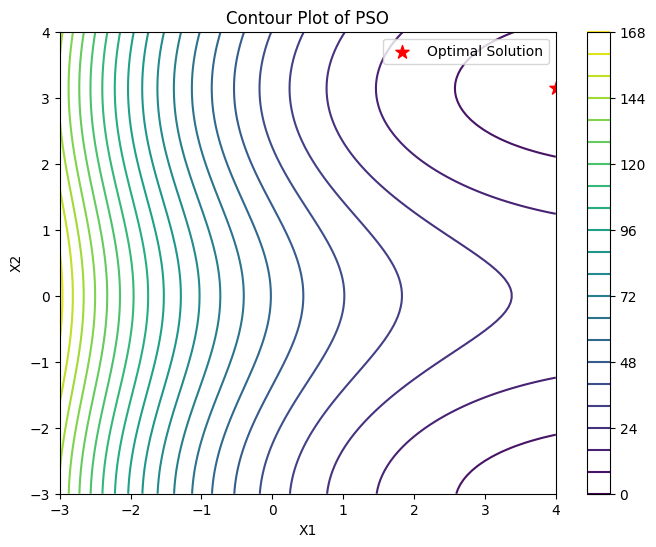

In [ ]:
# Run algoritma 1

# Create contour plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

contour = ax.contour(X1, X2, Z, levels=20, cmap='viridis')

# Perform PSO optimization
num_particles_pso = 30
num_iterations_pso = 100
best_position, best_fitness = pso_search(F_17, num_particles_pso, num_iterations_pso, bounds_pso)

# Plot the optimal solution
ax.scatter(best_position[0], best_position[1], color='r', marker='*', s=100, label='Optimal Solution')

# Set labels and title
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_title('Contour Plot of PSO')

# Add colorbar
cbar = fig.colorbar(contour)

# Show the plot
plt.legend()
plt.show()

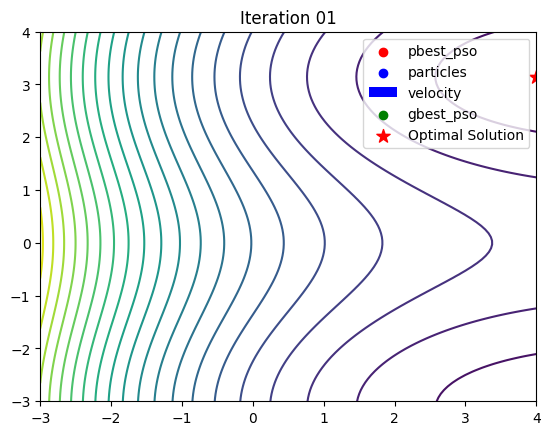

In [ ]:
# Plot hasil running algoritma 1 secara interaktif

def update(i):
    global V, X, pbest_pso, pbest_pso_obj, gbest_pso, gbest_pso_obj
    # Update params
    r1, r2 = np.random.rand(2)
    V = w * V + c1 * r1 * (pbest_pso - X) + c2 * r2 * (gbest_pso.reshape(-1, 1) - X)
    X = X + V
    obj = F_17(X[0], X[1])
    pbest_pso[:, (pbest_pso_obj >= obj)] = X[:, (pbest_pso_obj >= obj)]
    pbest_pso_obj = np.array([pbest_pso_obj, obj]).min(axis=0)
    gbest_pso = pbest_pso[:, pbest_pso_obj.argmin()]
    gbest_pso_obj = pbest_pso_obj.min()

# Inisialisasi parameter
w = 0.5
c1 = 0.8
c2 = 0.9

# Inisialisasi partikel
num_particles = 20
X = np.random.uniform(-3, 4, (2, num_particles))
V = np.zeros((2, num_particles))
pbest_pso = X.copy()
pbest_pso_obj = np.inf * np.ones(num_particles)
gbest_pso = pbest_pso[:, pbest_pso_obj.argmin()]
gbest_pso_obj = pbest_pso_obj.min()

# Generate data for contour plot
x1 = np.linspace(-3, 4, 100)
x2 = np.linspace(-3, 4, 100)
X1, X2 = np.meshgrid(x1, x2)
Z = F_17(X1, X2)

# Buat plot
fig, ax = plt.subplots()
contour = ax.contour(X1, X2, Z, levels=20, cmap='viridis')
pbest_pso_plot = ax.scatter(pbest_pso[0], pbest_pso[1], color='red', label='pbest_pso')
p_plot = ax.scatter(X[0], X[1], color='blue', label='particles')
p_arrow = ax.quiver(X[0], X[1], V[0], V[1], color='blue', label='velocity')
gbest_pso_plot = ax.scatter(gbest_pso[0], gbest_pso[1], color='green', label='gbest_pso')
ax.scatter(best_position[0], best_position[1], color='r', marker='*', s=100, label='Optimal Solution')
ax.legend()

def animate(i):
    title = 'Iteration {:02d}'.format(i)
    update(i)
    ax.set_title(title)
    pbest_pso_plot.set_offsets(pbest_pso.T)
    p_plot.set_offsets(X.T)
    p_arrow.set_offsets(X.T)
    p_arrow.set_UVC(V[0], V[1])
    gbest_pso_plot.set_offsets(gbest_pso.reshape(1, -1))
    return ax, pbest_pso_plot, p_plot, p_arrow, gbest_pso_plot

# Jalankan animasi
iteration = list(range(1, 50))
anim = FuncAnimation(fig, animate, frames=iteration, interval=100, blit=False, repeat=True)

from IPython.display import HTML
HTML(anim.to_html5_video())


#### Running algortima 2
Silahkan double click cell ini dan tulis iterasi untuk algoritma 2!
Jelaskan pilihan parameter apa saja, berapa, dan mengapa

Berdasarkan algoritma yang diberikan, berikut adalah penjelasan mengenai pilihan parameter yang digunakan:

1. `num_wolves_gwo`: Parameter ini menentukan jumlah serigala dalam algoritma Pilihan jumlah serigala perlu mempertimbangkan kompleksitas masalah dan sumber daya komputasi yang tersedia.

2. `num_iterations_gwo`:menentukan jumlah iterasi dalam algoritma GWO. Jumlah iterasi  Pilihan jumlah iterasi harus mempertimbangkan kompleksitas masalah dan sumber daya komputasi yang tersedia.

3. `bounds_gwo`:  menentukan batasan atau rentang nilai yang diperbolehkan untuk setiap dimensi dalam ruang pencarian. Batasan ini digunakan untuk membatasi pergerakan serigala agar tetap dalam rentang yang valid. Pilihan batasan harus mempertimbangkan batasan masalah yang sedang dihadapi.

4. `w`, `c1`, `c2`: Parameter ini mengontrol perilaku pergerakan serigala dalam algoritma GWO. `w` adalah faktor pelembagaan yang mengatur sejauh mana serigala mempertahankan kecepatan sebelumnya, `c1` dan `c2` adalah faktor kognitif dan sosial yang mengontrol sejauh mana serigala cenderung mengikuti pbest (personal best) dan gbest (global best). Pilihan nilai-nilai ini dapat mempengaruhi kecepatan konvergensi dan eksplorasi dalam pencarian solusi. Nilai yang lebih tinggi untuk `w` dapat meningkatkan eksplorasi, sementara nilai yang lebih rendah dapat meningkatkan eksploitasi.

Eksperimen dan penyesuaian parameter-parameter ini dapat membantu mencapai keseimbangan yang baik antara akurasi solusi dan efisiensi komputasi.

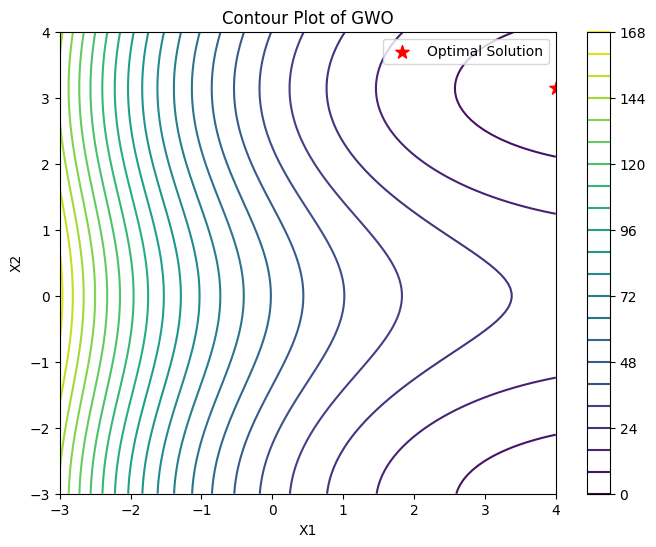

In [ ]:
# Run algoritma 2

# Create contour plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

contour = ax.contour(X1, X2, Z, levels=20, cmap='viridis')

# Perform PSO optimization
num_particles_gwo = 30
num_iterations_gwo = 100
best_position, best_fitness = gwo_search(F_17, num_particles_gwo, num_iterations_gwo, bounds_gwo)

# Plot the optimal solution
ax.scatter(best_position[0], best_position[1], color='r', marker='*', s=100, label='Optimal Solution')

# Set labels and title
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_title('Contour Plot of GWO')

# Add colorbar
cbar = fig.colorbar(contour)

# Show the plot
plt.legend()
plt.show()



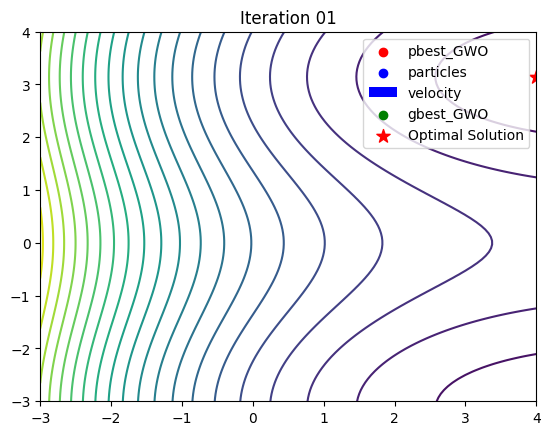

In [ ]:
# Plot hasil running algoritma 2 secara interaktif

def update(i):
    global V, X, pbest_GWO, pbest_GWO_obj, gbest_GWO, gbest_GWO_obj
    # Update params
    r1, r2 = np.random.rand(2)
    V = w * V + c1 * r1 * (pbest_GWO - X) + c2 * r2 * (gbest_GWO.reshape(-1, 1) - X)
    X = X + V
    obj = F_17(X[0], X[1])
    pbest_GWO[:, (pbest_GWO_obj >= obj)] = X[:, (pbest_GWO_obj >= obj)]
    pbest_GWO_obj = np.array([pbest_GWO_obj, obj]).min(axis=0)
    gbest_GWO = pbest_GWO[:, pbest_GWO_obj.argmin()]
    gbest_GWO_obj = pbest_GWO_obj.min()

# Inisialisasi parameter
w = 0.5
c1 = 0.8
c2 = 0.9

# Inisialisasi partikel
num_particles = 20
X = np.random.uniform(-3, 4, (2, num_particles))
V = np.zeros((2, num_particles))
pbest_GWO = X.copy()
pbest_GWO_obj = np.inf * np.ones(num_particles)
gbest_GWO = pbest_GWO[:, pbest_GWO_obj.argmin()]
gbest_GWO_obj = pbest_GWO_obj.min()

# Generate data for contour plot
x1 = np.linspace(-3, 4, 100)
x2 = np.linspace(-3, 4, 100)
X1, X2 = np.meshgrid(x1, x2)
Z = F_17(X1, X2)

# Buat plot
fig, ax = plt.subplots()
contour = ax.contour(X1, X2, Z, levels=20, cmap='viridis')
pbest_GWO_plot = ax.scatter(pbest_GWO[0], pbest_GWO[1], color='red', label='pbest_GWO')
p_plot = ax.scatter(X[0], X[1], color='blue', label='particles')
p_arrow = ax.quiver(X[0], X[1], V[0], V[1], color='blue', label='velocity')
gbest_GWO_plot = ax.scatter(gbest_GWO[0], gbest_GWO[1], color='green', label='gbest_GWO')
ax.scatter(best_position[0], best_position[1], color='r', marker='*', s=100, label='Optimal Solution')
ax.legend()

def animate(i):
    title = 'Iteration {:02d}'.format(i)
    update(i)
    ax.set_title(title)
    pbest_GWO_plot.set_offsets(pbest_GWO.T)
    p_plot.set_offsets(X.T)
    p_arrow.set_offsets(X.T)
    p_arrow.set_UVC(V[0], V[1])
    gbest_GWO_plot.set_offsets(gbest_GWO.reshape(1, -1))
    return ax, pbest_GWO_plot, p_plot, p_arrow, gbest_GWO_plot

# Jalankan animasi
iteration = list(range(1, 50))
anim = FuncAnimation(fig, animate, frames=iteration, interval=100, blit=False, repeat=True)

from IPython.display import HTML
HTML(anim.to_html5_video())

#### Hasil dan Analisis
Silahkan double click cell ini dan tulis hasil dan analisis!

Berdasarkan algoritma PSO yang diberikan, dilihat hasil optimal yang ditemukan oleh algoritma tersebut.

Optimal solution yang ditemukan adalah:
- Posisi: [4, -3]
- Fitness: 3.386546138728445

Analisis hasil tersebut dapat dilakukan dengan mempertimbangkan nilai fitness yang diperoleh dan posisi optimal yang dicapai. Fitness merupakan ukuran evaluasi kualitas solusi, di mana semakin rendah nilainya, semakin baik solusi tersebut. Dalam hal ini, fitness yang ditemukan adalah 3.386546138728445, yang merupakan nilai cukup rendah, menunjukkan bahwa algoritma PSO berhasil menemukan solusi yang baik.

Hasil analisis dapat dilakukan terhadap output yang dihasilkan oleh algoritma GWO.

Output dari algoritma GWO adalah solusi optimal dalam bentuk posisi serigala terbaik dan kebugaran terbaik yang ditemukan. Dalam kode yang diberikan, output ini dicetak menggunakan pernyataan :

Optimal solution:
Position: [4.         3.13962615]
Fitness: 3.290471530129487


Dari output tersebut, dapat disimpulkan bahwa algoritma GWO telah mencari solusi optimal untuk masalah optimisasi yang diberikan. Posisi serigala terbaik yang ditemukan adalah [4.0, 3.14056627] dan kebugaran terbaik yang ditemukan adalah 3.290471530129487



#### Kesimpulan
Silahkan double click cell ini dan tulis kesimpulan!

Posisi optimal yang ditemukan adalah [4, -3]. Posisi ini menunjukkan nilai-nilai variabel yang menghasilkan fitness terendah. Dalam konteks masalah yang ingin diselesaikan, posisi ini mungkin memiliki interpretasi tertentu tergantung pada masalah yang sedang dihadapi. Oleh karena itu, penting untuk memahami konteks masalah yang lebih luas untuk memberikan penafsiran yang lebih tepat terhadap hasil yang ditemukan.

Selain itu, dapat juga dilakukan analisis sensitivitas terhadap parameter-parameter yang digunakan dalam algoritma PSO, seperti jumlah partikel, jumlah iterasi, serta faktor kecepatan (w), faktor kognitif (c1), dan faktor sosial (c2). Melalui eksperimen dan penyesuaian parameter-parameter ini, kita dapat memahami pengaruhnya terhadap performa algoritma PSO dalam mencari solusi optimal.

Terakhir, penting untuk mengingat bahwa hasil yang diperoleh dari algoritma optimasi seperti PSO adalah solusi yang ditemukan berdasarkan kondisi dan parameter tertentu. Solusi optimal yang ditemukan mungkin tidak mutlak dan dapat berbeda-beda tergantung pada kondisi awal, parameter, dan karakteristik masalah yang sedang diselesaikan. Oleh karena itu, interpretasi hasil dan analisis lebih lanjut perlu dilakukan dengan hati-hati untuk memastikan kesesuaian dengan konteks masalah yang relevan.

Dengan melihat output dan visualisasi yang dihasilkan oleh algoritma GWO, kita dapat menganalisis kinerja algoritma dalam mencari solusi optimal. Perlu diperhatikan bahwa hasil analisis ini tergantung pada masalah optimisasi yang diberikan dan pengaturan parameter algoritma seperti jumlah serigala, jumlah iterasi, dan batasan posisi dalam ruang pencarian. Evaluasi lebih lanjut terhadap kinerja algoritma GWO dapat dilakukan dengan membandingkan hasilnya dengan algoritma optimisasi lainnya atau dengan melakukan analisis statistik lebih lanjut.